# SVM

In [18]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [148]:
# 学習
from sklearn.svm import SVC

model = SVC(kernel="linear", C=100)
model.fit(X_train_pc, y_train)


SVC(C=100, kernel='linear')

In [149]:
# 予測
y_pred = model.predict(X_test_pc)

# 評価
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8888888888888888

In [150]:
# サポートベクトル
model.support_vectors_

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [ 1.01841242,  0.75406273],
       [ 1.14259734,  0.50582016],
       [ 1.00108719, -1.69126085],
       [ 0.76807504,  0.17465618],
       [-0.65005847, -1.76724016],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.83577732, -1.44733591],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 , -0.36356179],
       [ 0.21142607, -1.52270906],
       [ 1.01399725, -0.74821922],
       [ 0.86207563, -0.06985412],
       [ 1.28474342,  0.5928925 ],
       [ 1.326855  ,  0.92380604],
       [ 0.82552169, -0.03239705],
       [ 1.52725209,  0.96532955],
       [ 1.01399725, -0.74821922]])

## 決定境界とサポートベクトルの可視化

In [151]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

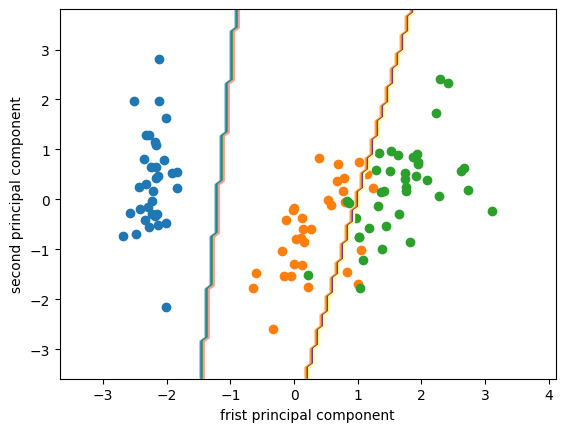

In [152]:
DecisionBoundaryDisplay.from_estimator(model,
                                       X_train_pc,
                                       plot_method="contour", 
                                       cmap=plt.cm.Paired,
                                       xlabel="frist principal component",
                                       ylabel="second principal component")


# 自分が考えたやり方
species_dict = {}
reidx_y_train = y_train.reset_index(drop=True)
for species in  model.classes_:
    idx = reidx_y_train[reidx_y_train.values == species].index
    species_value = X_train_pc[idx]
    species_dict[species] = species_value

for species in model.classes_:
    plt.scatter(species_dict[species][:, 0], species_dict[species][:, 1])

In [153]:
# 自分が考えたやり方
species_dict = {}
reidx_y_train = y_train.reset_index(drop=True)
for species in  model.classes_:
    idx = reidx_y_train[reidx_y_train.values == species].index
    species_value = X_train_pc[idx]
    
    species_dict[species] = species_value

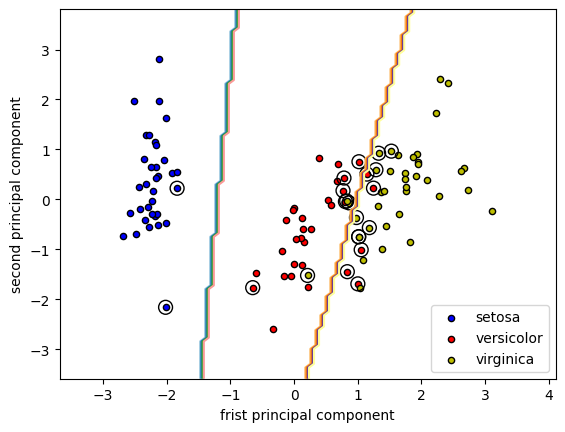

In [154]:
# 決定境界描画
DecisionBoundaryDisplay.from_estimator(model,
                                       X_train_pc,
                                       plot_method="contour", 
                                       cmap=plt.cm.Paired,
                                       xlabel="frist principal component",
                                       ylabel="second principal component")

# かめさんのお手本
# (PCA後)の学習データの描画
for class_, color in zip(model.classes_, 'bry'): 
    # np.whereだとy_trainのindexに引きずられない
    idx = np.where(y_train == class_)
    plt.scatter(X_train_pc[idx, 0],
                X_train_pc[idx, 1],
                c=color, label=class_,
                edgecolor='black',
                s=20)

# サポートベクター描画
plt.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        facecolor='none',
        edgecolors='black',
       linewidths=1)

plt.legend()

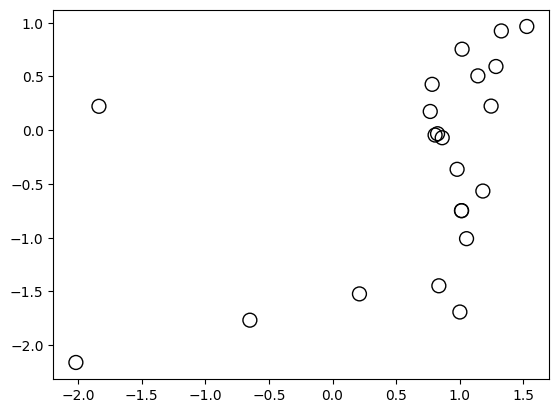

In [155]:
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=100,
            facecolor='none',
            edgecolors='black',
           linewidths=1)